## Data Preprocess

In [1]:
sentences = ['i feel hungry', 'i eat lunch', 'now i feel happy']

word_list = 'i feel hungry'.split()
word_list

['i', 'feel', 'hungry']

In [2]:
# Data dictionary
words = ['<PAD>','<BOS>','<UNK>','i','feel','hungry','eat','lunch','now','happy']
index_to_word = {i:words[i] for i in range(len(words))}

In [3]:
index_to_word

{0: '<PAD>',
 1: '<BOS>',
 2: '<UNK>',
 3: 'i',
 4: 'feel',
 5: 'hungry',
 6: 'eat',
 7: 'lunch',
 8: 'now',
 9: 'happy'}

In [4]:
# word to index 
word_to_index = {word:index for index, word in index_to_word.items()}

In [5]:
word_to_index['feel']

4

In [6]:
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']] + [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

print(get_encoded_sentence('i eat lunch', word_to_index))

[1, 3, 6, 7]


In [7]:
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

encoded_sentences = get_encoded_sentences(sentences, word_to_index)
encoded_sentences 

[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]

In [8]:
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])

print(get_decoded_sentence([1, 3, 4, 5], index_to_word))

i feel hungry


In [9]:
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(sentence, index_to_word) for sentence in encoded_sentences]

print(get_decoded_sentences(encoded_sentences, index_to_word))

['i feel hungry', 'i eat lunch', 'now i feel happy']


In [10]:
import numpy as np
import tensorflow as tf
import os

vocab_size = len(word_to_index)
word_vector_dim = 4
embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)

raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype='object')
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs,
                                                           value=word_to_index['<PAD>'],
                                                           padding='post',
                                                           maxlen=5)
output = embedding(raw_inputs)
print(output)

tf.Tensor(
[[[ 0.02402927  0.00186527 -0.01492419 -0.0032333 ]
  [-0.01008184  0.0279021   0.04592328  0.04250694]
  [ 0.01906487 -0.02347385 -0.00398097  0.0068688 ]
  [-0.01566767  0.02748873 -0.0074115   0.00467551]
  [ 0.01768601  0.00323699 -0.0182179  -0.03781128]]

 [[ 0.02402927  0.00186527 -0.01492419 -0.0032333 ]
  [-0.01008184  0.0279021   0.04592328  0.04250694]
  [-0.00700132  0.02881706 -0.01739694 -0.00442203]
  [ 0.00743074 -0.02404797 -0.03063752  0.03033907]
  [ 0.01768601  0.00323699 -0.0182179  -0.03781128]]

 [[ 0.02402927  0.00186527 -0.01492419 -0.0032333 ]
  [ 0.03530974 -0.03338586 -0.02736717 -0.00962646]
  [-0.01008184  0.0279021   0.04592328  0.04250694]
  [ 0.01906487 -0.02347385 -0.00398097  0.0068688 ]
  [-0.02055052  0.03847177 -0.028807   -0.02220799]]], shape=(3, 5, 4), dtype=float32)


## Define Models

In [11]:
vocab_size = 10
word_vector_dim = 4

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8)) # LSTM state 벡터의 차원수는 8
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 긍부정 1dim

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 416       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


In [12]:
vocab_size = 10
word_vector_dim = 4

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          464       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [13]:
vocab_size = 10
word_vector_dim = 4

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


## IMDB data set
50000개의 리뷰 중 절반인 25000개가 훈련용  
나머지 25000개는 테스트 데이터

imdb.load_data에서 num_words=10000를 지정하면 개수만큼의 word_to_index  
 딕셔너리가 생성된 형태로 데이터셋이 생성됨

In [14]:
imdb = tf.keras.datasets.imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print(f"train sample: {len(x_train)}, test sample: {len(x_test)},")

17473536/17464789 [==============================] - 0s 0us/step
train sample: 25000, test sample: 25000,


In [15]:
print(x_train[0], y_train[0], len(x_train[0]), len(x_train[1]), sep='\n')

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
218
189


In [16]:
word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1], word_to_index['the'])

1654784/1641221 [==============================] - 0s 0us/step
the 1


In [17]:
word_to_index = {k:(v+3) for k,v in word_to_index.items()}

word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2
word_to_index['<UNUSED>'] = 3

index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1], word_to_index['the'], index_to_word[4])

<BOS> 4 the


In [18]:
print(get_decoded_sentence(x_train[0], index_to_word))
print(y_train[0])

this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

문장을 pad_sequence를 통해 길이를 통일시켜야 하는데 이때
문장의 최대길이, maxlen의 설정도 전체 모델 성능의 영향을 미침

In [19]:
total_data_text = list(x_train) + list(x_test)

num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
print("문장길이 평균: ", np.mean(num_tokens))
print("문장길이 최대: ", np.max(num_tokens))
print("문장길이 표준편차 ", np.std(num_tokens))

max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print(f'전체 문장의 {np.sum(num_tokens < max_tokens) / len(num_tokens)}%가 maxlen 설정값 이내에 포함됩니다')

문장길이 평균:  234.75892
문장길이 최대:  2494
문장길이 표준편차  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다


padding의 방식에서도 앞(pre)와 뒤(post)중 어느쪽으로 하냐에 따라 RNN을 이용한   딥러닝 적용시 성능 차이가 발생하게됨

In [20]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre',
                                                        maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre',
                                                       maxlen=maxlen)
print(x_train.shape)

(25000, 580)


## Model Define(LSTM)

In [21]:
vocab_size = 10000
word_vector_dim = 16

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 165,313
Trainable params: 165,313
Non-trainable params: 0
_________________________________________________________________


## Split Dataset

In [22]:
# validation 분리
x_val = x_train[:10000]
y_val = y_train[:10000]

# validation 제외 train set
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


## Train Model

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs=20

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 5s 48ms/step - loss: 0.6896 - accuracy: 0.5903 - val_loss: 0.6746 - val_accuracy: 0.7136
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5696 - accuracy: 0.7797 - val_loss: 0.4400 - val_accuracy: 0.8453
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3463 - accuracy: 0.8755 - val_loss: 0.3455 - val_accuracy: 0.8587
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2425 - accuracy: 0.9102 - val_loss: 0.3379 - val_accuracy: 0.8641
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1767 - accuracy: 0.9417 - val_loss: 0.3448 - val_accuracy: 0.8637
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1353 - accuracy: 0.9589 - val_loss: 0.3696 - val_accuracy: 0.8660
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1089 - accuracy: 0.9689 - val_loss: 0.4243 - val_accuracy: 0.8630
Epoch 8/20
30

In [24]:
results = model.evaluate(x_test, y_test, verbose=2)
print(results)

782/782 - 5s - loss: 0.8652 - accuracy: 0.8345
[0.8652198314666748, 0.8344799876213074]


In [25]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Visualize Model Evaluation

과적합 되는 현상이 확인됨
Loss의 관점

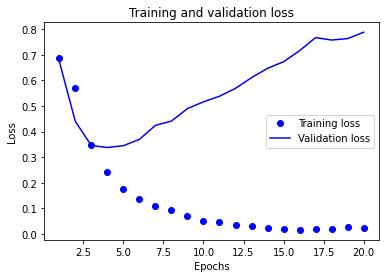

In [26]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

bo = blue dot  
b = blue line  
정확도 관점

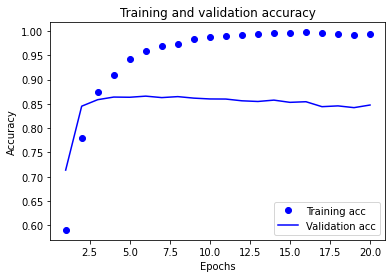

In [27]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [28]:
!mkdir ./data
!pip install gensim

In [29]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)

(10000, 16)


##Save Trained Parameter 

In [30]:
word2vec_file_path = os.path.join(os.getcwd(), 'data/word2vec.txt')
with open(word2vec_file_path, 'w') as f:
    f.write(f'{vocab_size-4} {word_vector_dim}\n')
    # 단어 개수 중 특수토큰 제외하고 워드 벡터를 파일에 기록
    vectors = model.get_weights()[0]
    for i in range(4, vocab_size):
        f.write(f"{index_to_word[i]} {' '.join(map(str,list(vectors[i,:])))}\n")

## Gensim
Load Keyed Vector

In [31]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

array([ 0.04747226,  0.00916724,  0.01663195, -0.03837691,  0.01542726,
       -0.02202088, -0.01096718,  0.03983332, -0.05059833, -0.01619511,
        0.02192338, -0.05075467,  0.01721585,  0.02703262, -0.01678072,
        0.04615448], dtype=float32)

In [32]:
word_vectors.similar_by_word("love")

[('towns', 0.9120420217514038),
 ('upbeat', 0.869189977645874),
 ('zorro', 0.8682690858840942),
 ('killer', 0.8677477836608887),
 ('crisp', 0.8672412633895874),
 ('lung', 0.8591021299362183),
 ('creation', 0.8582161664962769),
 ('dynamics', 0.855837345123291),
 ('stance', 0.8538647890090942),
 ('widescreen', 0.8483147621154785)]

In [33]:
# Get Word Vector from Google
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2022-01-20 11:41:11--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.226.232
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.226.232|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [35]:
from gensim.models import KeyedVectors

word2vec_path = 'GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
vector = word2vec['computer']
vector

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [36]:
word2vec.similar_by_word("love")

[('loved', 0.6907792091369629),
 ('adore', 0.6816873550415039),
 ('loves', 0.6618633270263672),
 ('passion', 0.6100709438323975),
 ('hate', 0.600395679473877),
 ('loving', 0.5886635780334473),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547305345535278),
 ('absolutely_adore', 0.5536839962005615),
 ('adores', 0.5440906882286072)]

In [37]:
vocav_size = 10000 # 어휘 사전 크기
word_vector_dim = 300 # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 word2vec 워드벡터 단어를 카피
for i in range(4, vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]


In [38]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000
word_vector_dim = 300

# model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(
    vocab_size, word_vector_dim,
    embeddings_initializer=Constant(embedding_matrix), # 카피한 임베딩 활용
    input_length=maxlen,
    trainable=True, # True를 주면 fine tuning
))
model.add(tf.keras.layers.LSTM(512))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 580, 300)          3000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               1665024   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 4,997,505
Trainable params: 4,997,505
Non-trainable params: 0
____________________________________________

In [39]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

epochs=5

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=epochs,
    batch_size=512,
    validation_data=(x_val,y_val),
    verbose=1
)

Epoch 1/5
30/30 [==============================] - 45s 1s/step - loss: 0.7552 - accuracy: 0.6044 - val_loss: 0.6004 - val_accuracy: 0.6549
Epoch 2/5
30/30 [==============================] - 41s 1s/step - loss: 0.6099 - accuracy: 0.7057 - val_loss: 0.5446 - val_accuracy: 0.7333
Epoch 3/5
30/30 [==============================] - 42s 1s/step - loss: 0.5197 - accuracy: 0.7464 - val_loss: 0.5138 - val_accuracy: 0.7616
Epoch 4/5
30/30 [==============================] - 41s 1s/step - loss: 0.3592 - accuracy: 0.8473 - val_loss: 0.3686 - val_accuracy: 0.8387
Epoch 5/5
30/30 [==============================] - 41s 1s/step - loss: 0.2559 - accuracy: 0.8981 - val_loss: 0.3416 - val_accuracy: 0.8534


In [40]:
results = model.evaluate(x_test, y_test, verbose=2)
print(results)

782/782 - 28s - loss: 0.3447 - accuracy: 0.8514
[0.3446733057498932, 0.851360023021698]


## Naver Movie Review Sentiment Classification

In [ ]:
!git clone https://github.com/e9t/nsmc.git

### Create Data_loader

In [41]:
import pandas as pd

train_df = pd.read_table('ratings_train.txt')
test_df = pd.read_table('ratings_test.txt')
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
!apt install yum

In [ ]:
!yum install gcc-c++ java-1.8.0-openjdk-devel python3 python3-devel python3-pip make diffutils
!yum install curl git

In [ ]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
!pip install konlpy

In [42]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ["의","가","이","은","들","는","는","좀","잘","걍","과","도","를","으로","자","에","와","한","하다"]



위의 갑작스러운 명령어들은 코랩환경에서 동작하기 위한 시도였다  
Mecab을 쓰기위해서 제반 개발환경이 여러가지가 필요하다는 걸 깨닫게 되었는데  
이로인해 사전에 개발환경부터가 개발의 시작이라는 걸 명심하게 되었다  

### 결측치 제거

In [43]:
train_df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [44]:
train_df[train_df.document.isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [45]:
train_df.dropna(axis=0, inplace=True)

In [46]:
test_df.isnull().sum()

id          0
document    3
label       0
dtype: int64

In [47]:
test_df[test_df.document.isnull()]

,id,document,label
5746,402110,NaN,1
7899,5026896,NaN,0
27097,511097,NaN,1


In [48]:
test_df.dropna(axis=0, inplace=True)

중복 데이터 확인 및 제거

In [49]:
train_df.duplicated().sum()

0

In [50]:
test_df.duplicated().sum()

0

### 특수문자 제거

In [51]:
import re
def clean_text(sentence):
  text_rmv = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', sentence)
  return text_rmv

In [52]:
train_df['document'] = train_df['document'].apply(clean_text)
test_df['document'] = test_df['document'].apply(clean_text)

. , 표시등 특수문자가 다소 들어가있어서 토크나이징을 방해했기 때문에  
인터넷에 특수문자를 없애는 정규표현식을 찾아서 제거하게 되었다  
딱 배운건 아니지만 다른 사람이 짜둔걸 가져오면서 자주 봤다보니 사용법에도 조금씩 익숙해지는 듯 하다

### 토크나이징

In [53]:
tokenizer.morphs(train_df.document[0])

['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리']

In [54]:
train_df['tokenized'] = train_df['document'].apply(lambda x: tokenizer.morphs(x))
test_df['tokenized'] = test_df['document'].apply(lambda x: tokenizer.morphs(x))

불용어 제거

In [55]:
train_df['removed'] = train_df['tokenized'].apply(lambda x: [word for word in x if not word in stopwords])

In [56]:
test_df['removed'] = test_df['tokenized'].apply(lambda x: [word for word in x if not word in stopwords])

In [57]:
train_word = []
for i in train_df[['removed']].itertuples():
    train_temp = [j for j in i.removed]
    train_word.append(train_temp)
test_word = []
for i in test_df[['removed']].itertuples():
    test_temp = [j for j in i.removed]
    test_word.append(test_temp)

pandas 활용 하는 능력을 키울겸 데이터프레임 안에서 기존의 코드와  
비슷하게 따라가보고자 노력했다
덕분에 전처리에 다소 시간은 더 걸렸지만 숙련도가 높아질수록 더 좋은 효과를 볼 수 있으리라 본다

vocab 만들기

In [58]:
words = np.concatenate(train_word).tolist()
counter = Counter(words)
counter = counter.most_common(10000-4)

In [59]:
counter[:10]

[('영화', 57651),
 ('다', 55378),
 ('고', 47281),
 ('하', 44716),
 ('을', 29907),
 ('보', 25571),
 ('게', 22189),
 ('지', 19053),
 ('있', 16750),
 ('없', 15872)]

In [60]:
vocab=["<PAD>","<BOS<","<UNK>","<UNUSED>"] + [key for key, _ in counter]
vocab[:10]

['<PAD>', '<BOS<', '<UNK>', '<UNUSED>', '영화', '다', '고', '하', '을', '보']

In [61]:
len(vocab)

10000

Word to index

In [62]:
word_to_index = {word:index for index, word in enumerate(vocab)}
word_to_index

{'<PAD>': 0,
 '<BOS<': 1,
 '<UNK>': 2,
 '<UNUSED>': 3,
 '영화': 4,
 '다': 5,
 '고': 6,
 '하': 7,
 '을': 8,
 '보': 9,
 '게': 10,
 '지': 11,
 '있': 12,
 '없': 13,
 '좋': 14,
 '나': 15,
 '었': 16,
 '만': 17,
 '는데': 18,
 '너무': 19,
 '봤': 20,
 '적': 21,
 '안': 22,
 '정말': 23,
 '로': 24,
 '음': 25,
 '것': 26,
 '아': 27,
 '네요': 28,
 '재밌': 29,
 '어': 30,
 '점': 31,
 '지만': 32,
 '같': 33,
 '진짜': 34,
 '에서': 35,
 '했': 36,
 '기': 37,
 '네': 38,
 '않': 39,
 '거': 40,
 '았': 41,
 '수': 42,
 '되': 43,
 '면': 44,
 'ㅋㅋ': 45,
 '인': 46,
 '말': 47,
 '연기': 48,
 '최고': 49,
 '주': 50,
 '내': 51,
 '평점': 52,
 '이런': 53,
 '던': 54,
 '어요': 55,
 '할': 56,
 '왜': 57,
 '1': 58,
 '겠': 59,
 '스토리': 60,
 '해': 61,
 '습니다': 62,
 'ㅋㅋㅋ': 63,
 '듯': 64,
 '아니': 65,
 '드라마': 66,
 '생각': 67,
 '더': 68,
 '그': 69,
 '싶': 70,
 '사람': 71,
 '감동': 72,
 '때': 73,
 '배우': 74,
 '함': 75,
 '본': 76,
 '까지': 77,
 '뭐': 78,
 '알': 79,
 '볼': 80,
 '만들': 81,
 '내용': 82,
 '보다': 83,
 '라': 84,
 '감독': 85,
 '재미': 86,
 '그냥': 87,
 '시간': 88,
 '재미있': 89,
 '지루': 90,
 '중': 91,
 '년': 92,
 '잼': 93,
 '10': 94,
 

In [63]:
def wordlist_to_indexlist(wordlist):
    return [word_to_index[word] if word in word_to_index else word_to_index["<UNK>"] for word in wordlist]

In [64]:
X_train = list(map(wordlist_to_indexlist, train_word))
X_test = list(map(wordlist_to_indexlist, test_word))

In [65]:
y_train = np.array(list(train_df['label']))
y_test = np.array(list(test_df['label']))

In [66]:
index_to_word = {index:word for word,index in word_to_index.items()}

In [67]:
# 문장과 딕셔너리를 함께주면 단어 인덱스 리스트 벡터로 변환
# 모든 문장은 BOS로 시작
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

In [68]:
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

In [69]:
def get_decoded_sentence(encoded_sentence, index_to_word):
    return " ".join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])

In [70]:
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(sentence,index_to_word) for sentence in encoded_sentences]

In [71]:
X = get_decoded_sentences(X_train, index_to_word)

In [72]:
X_t = get_decoded_sentences(X_test, index_to_word)

In [73]:
total_data_text = X + X_t

In [74]:
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
print("문장길이 평균: ", np.mean(num_tokens))
print("문장길이 최대: ", np.max(num_tokens))
print("문장길이 표준편차 ", np.std(num_tokens))

max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print(f'전체 문장의 {np.sum(num_tokens < max_tokens) / len(num_tokens)}%가 maxlen 설정값 이내에 포함됩니다')

문장길이 평균:  34.59880895235809
문장길이 최대:  318
문장길이 표준편차  32.62034964052177
pad_sequences maxlen :  99
전체 문장의 0.9344173766950677%가 maxlen 설정값 이내에 포함됩니다


시각화보단 덜하지만 직관적으로 데이터의 상태를 볼 수 있어 좋았고 계산과 함께  
파라미터화 시켜두면 추가적인 고민 없이 계속 코딩을 진행하기에 좋을 것 같다

In [75]:
import tensorflow as tf

In [76]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre',
                                                        maxlen=maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre',
                                                       maxlen=maxlen)
print(X_train.shape)

(149995, 99)


## Model 1

In [77]:
vocab_size = len(vocab)
word_vector_dim = 99

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(99))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


# validation 분리
X_val = X_train[:120000]
y_val = y_train[:120000]

# validation 제외 train set
partial_x_train = X_train[120000:]
partial_y_train = y_train[120000:]

print(partial_x_train.shape)
print(partial_y_train.shape)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs=10

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)
results = model.evaluate(X_test, y_test, verbose=2)
print(results)
history_dict = history.history
print(history_dict.keys())

(29995, 99)
(29995,)
Epoch 1/10
59/59 [==============================] - 4s 52ms/step - loss: 0.6215 - accuracy: 0.6927 - val_loss: 0.4754 - val_accuracy: 0.7852
Epoch 2/10
59/59 [==============================] - 3s 45ms/step - loss: 0.3872 - accuracy: 0.8335 - val_loss: 0.3885 - val_accuracy: 0.8270
Epoch 3/10
59/59 [==============================] - 3s 45ms/step - loss: 0.3021 - accuracy: 0.8796 - val_loss: 0.3937 - val_accuracy: 0.8277
Epoch 4/10
59/59 [==============================] - 3s 46ms/step - loss: 0.2626 - accuracy: 0.9001 - val_loss: 0.4102 - val_accuracy: 0.8264
Epoch 5/10
59/59 [==============================] - 3s 46ms/step - loss: 0.2312 - accuracy: 0.9135 - val_loss: 0.4433 - val_accuracy: 0.8217
Epoch 6/10
59/59 [==============================] - 3s 47ms/step - loss: 0.2045 - accuracy: 0.9254 - val_loss: 0.4686 - val_accuracy: 0.8178
Epoch 7/10
59/59 [==============================] - 3s 47ms/step - loss: 0.1785 - accuracy: 0.9358 - val_loss: 0.5095 - val_accuracy:

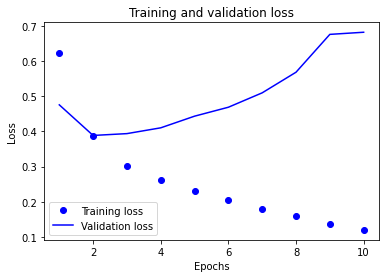

In [78]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

LSTM과 함게 랜덤하게 파라미터를 구성하였는데 조금의 에포크 이후로 과적합되는 현상이  
발생하였다 레이어 구성에 대해서 이론적인 지식이 더 필요함

## Model 2

In [79]:
vocab_size = len(vocab)
word_vector_dim = 99

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


# validation 분리
X_val = X_train[:120000]
y_val = y_train[:120000]

# validation 제외 train set
partial_x_train = X_train[120000:]
partial_y_train = y_train[120000:]

print(partial_x_train.shape)
print(partial_y_train.shape)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs=20

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)
results = model.evaluate(X_test, y_test, verbose=2)
print(results)
history_dict = history.history
print(history_dict.keys())

(29995, 99)
(29995,)
Epoch 1/20
59/59 [==============================] - 3s 28ms/step - loss: 0.6877 - accuracy: 0.5582 - val_loss: 0.6608 - val_accuracy: 0.6612
Epoch 2/20
59/59 [==============================] - 1s 16ms/step - loss: 0.5463 - accuracy: 0.7380 - val_loss: 0.4976 - val_accuracy: 0.7438
Epoch 3/20
59/59 [==============================] - 1s 16ms/step - loss: 0.4089 - accuracy: 0.8023 - val_loss: 0.4942 - val_accuracy: 0.7491
Epoch 4/20
59/59 [==============================] - 1s 15ms/step - loss: 0.3424 - accuracy: 0.8421 - val_loss: 0.5193 - val_accuracy: 0.7483
Epoch 5/20
59/59 [==============================] - 1s 15ms/step - loss: 0.2863 - accuracy: 0.8688 - val_loss: 0.5609 - val_accuracy: 0.7448
Epoch 6/20
59/59 [==============================] - 1s 15ms/step - loss: 0.2386 - accuracy: 0.8892 - val_loss: 0.6017 - val_accuracy: 0.7418
Epoch 7/20
59/59 [==============================] - 1s 15ms/step - loss: 0.1972 - accuracy: 0.9067 - val_loss: 0.6565 - val_accuracy:

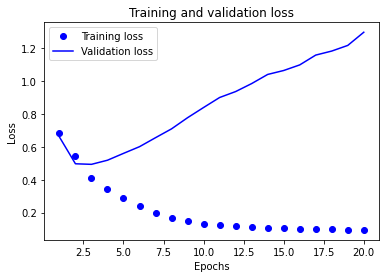

In [81]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

CNN처럼 구성한 내용인데 역시 적은 에포크 이후에 바로 과적합이 되어버렸다  
모델을 바꾸는 선에서의 개선은 쉽지 않아 보인다

## Model 3

In [82]:
vocab_size = len(vocab)
word_vector_dim = 99

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(99, 7, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(5))
model.add(tf.keras.layers.Conv1D(99, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


# validation 분리
X_val = X_train[:120000]
y_val = y_train[:120000]

# validation 제외 train set
partial_x_train = X_train[120000:]
partial_y_train = y_train[120000:]

print(partial_x_train.shape)
print(partial_y_train.shape)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs=10

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)
results = model.evaluate(X_test, y_test, verbose=2)
print(results)
history_dict = history.history
print(history_dict.keys())

(29995, 99)
(29995,)
Epoch 1/10
59/59 [==============================] - 4s 42ms/step - loss: 0.6635 - accuracy: 0.5865 - val_loss: 0.5390 - val_accuracy: 0.7250
Epoch 2/10
59/59 [==============================] - 2s 31ms/step - loss: 0.4715 - accuracy: 0.7624 - val_loss: 0.4845 - val_accuracy: 0.7533
Epoch 3/10
59/59 [==============================] - 2s 31ms/step - loss: 0.3837 - accuracy: 0.8175 - val_loss: 0.5012 - val_accuracy: 0.7514
Epoch 4/10
59/59 [==============================] - 2s 31ms/step - loss: 0.3272 - accuracy: 0.8463 - val_loss: 0.5445 - val_accuracy: 0.7463
Epoch 5/10
59/59 [==============================] - 2s 31ms/step - loss: 0.2711 - accuracy: 0.8731 - val_loss: 0.6050 - val_accuracy: 0.7424
Epoch 6/10
59/59 [==============================] - 2s 31ms/step - loss: 0.2224 - accuracy: 0.8937 - val_loss: 0.6744 - val_accuracy: 0.7357
Epoch 7/10
59/59 [==============================] - 2s 31ms/step - loss: 0.1847 - accuracy: 0.9099 - val_loss: 0.7716 - val_accuracy:

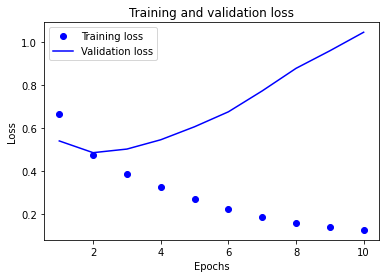

In [83]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

비슷한 모델에 뉴런의 갯수만 바꿔본 내용이지만 크게 달라지는 것이 없다  
데이터 자체가 크게 변한게 없어서 그런지 대체로 비슷한 현상이 발생한다

## Model 4

In [84]:
vocab_size = len(vocab)
word_vector_dim = 99

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


# validation 분리
X_val = X_train[:120000]
y_val = y_train[:120000]

# validation 제외 train set
partial_x_train = X_train[120000:]
partial_y_train = y_train[120000:]

print(partial_x_train.shape)
print(partial_y_train.shape)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs=10

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)
results = model.evaluate(X_test, y_test, verbose=2)
print(results)
history_dict = history.history
print(history_dict.keys())

(29995, 99)
(29995,)
Epoch 1/10
59/59 [==============================] - 1s 13ms/step - loss: 0.6658 - accuracy: 0.7370 - val_loss: 0.6130 - val_accuracy: 0.7987
Epoch 2/10
59/59 [==============================] - 1s 10ms/step - loss: 0.5166 - accuracy: 0.8272 - val_loss: 0.4419 - val_accuracy: 0.8187
Epoch 3/10
59/59 [==============================] - 1s 10ms/step - loss: 0.3632 - accuracy: 0.8621 - val_loss: 0.3796 - val_accuracy: 0.8311
Epoch 4/10
59/59 [==============================] - 1s 10ms/step - loss: 0.2900 - accuracy: 0.8880 - val_loss: 0.3689 - val_accuracy: 0.8363
Epoch 5/10
59/59 [==============================] - 1s 10ms/step - loss: 0.2432 - accuracy: 0.9088 - val_loss: 0.3697 - val_accuracy: 0.8358
Epoch 6/10
59/59 [==============================] - 1s 10ms/step - loss: 0.2058 - accuracy: 0.9258 - val_loss: 0.3797 - val_accuracy: 0.8360
Epoch 7/10
59/59 [==============================] - 1s 10ms/step - loss: 0.1740 - accuracy: 0.9404 - val_loss: 0.3911 - val_accuracy:

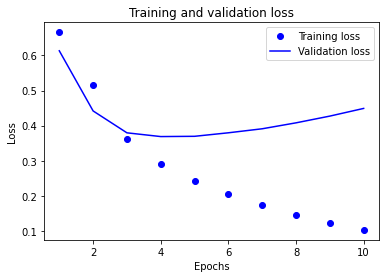

In [85]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

정말 간단한 레이어로 구성을 했는데도 사실상 결과가 비슷하게 나온다  
성능의 이점은 확실하게 볼 수 있었다

### trained layer analytics

In [86]:
import os

In [87]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)
word2vec_file_path = 'navermovie.txt'
with open(word2vec_file_path, 'w') as f:
    f.write(f'{vocab_size-4} {word_vector_dim}\n')
    # 단어 개수 중 특수토큰 제외하고 워드 벡터를 파일에 기록
    vectors = model.get_weights()[0]
    for i in range(4, vocab_size):
        f.write(f"{index_to_word[i]} {' '.join(map(str,list(vectors[i,:])))}\n")


(10000, 99)


In [88]:
from gensim.models.keyedvectors import Word2VecKeyedVectors
word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)

In [89]:
vector = word_vectors['영화']
vector

array([-0.10225441, -0.06343114, -0.07490182, -0.04450472, -0.08622109,
       -0.05782482, -0.04036952, -0.07430698, -0.09618952, -0.07585834,
       -0.07032312, -0.07263736, -0.07290525, -0.01592419,  0.02611524,
       -0.07087156, -0.08133247, -0.09632468, -0.07366094, -0.05733225,
       -0.02222209, -0.10437074, -0.01971608, -0.1010703 , -0.06978337,
       -0.06170178, -0.07167693, -0.08764325, -0.06125642, -0.05569237,
       -0.05442672, -0.07303219, -0.07147165, -0.06885384, -0.08078971,
       -0.06996785, -0.07468406, -0.0881625 , -0.07665418, -0.10129523,
       -0.00809469, -0.04051515, -0.07594855, -0.0643535 , -0.07568026,
       -0.05591517, -0.06408387, -0.07224893, -0.06611771, -0.07120726,
       -0.03781758, -0.07509864, -0.10245646, -0.03710039, -0.08496539,
       -0.09654107, -0.09508522, -0.05279119, -0.05023041, -0.04622685,
       -0.0666201 , -0.06573015, -0.00063159, -0.10388895, -0.01904689,
       -0.08434535, -0.04194871, -0.09705003, -0.06210348, -0.07

In [90]:
word_vectors.similar_by_word("사랑")

[('상큼', 0.5714950561523438),
 ('아주', 0.5711156725883484),
 ('춘', 0.5707631707191467),
 ('박수', 0.5658369660377502),
 ('무조건', 0.5491335988044739),
 ('멋', 0.5478000640869141),
 ('박보영', 0.5468530654907227),
 ('백', 0.5444365739822388),
 ('지나', 0.543109118938446),
 ('그립', 0.5395556092262268)]

In [91]:
word_vectors.similar_by_word("감독")

[('아서', 0.5166716575622559),
 ('개독', 0.48786744475364685),
 ('아', 0.4565810561180115),
 ('땜', 0.45479822158813477),
 ('불', 0.45033034682273865),
 ('마시', 0.4422617256641388),
 ('대로', 0.4417199492454529),
 ('내용', 0.440620481967926),
 ('이브', 0.4388628900051117),
 ('보다', 0.437381386756897)]

### 외부 말뭉치 사용해보기

In [92]:
import gensim
word2vec = gensim.models.Word2Vec.load('ko.bin')

In [93]:
index_to_word = {i:list(word2vec.wv.vocab.keys())[i] for i in range(len(word2vec.wv.vocab.keys()))}

In [94]:
len(index_to_word)

30185

## Last part Model 1

In [95]:
import numpy as np
import tensorflow as tf

In [118]:
vocab_size =len(index_to_word) # 어휘 사전 크기
word_vector_dim = word2vec.vector_size # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 word2vec 워드벡터 단어를 카피
for i in range(4, vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

from tensorflow.keras.initializers import Constant
# model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(
    vocab_size, word_vector_dim,
    embeddings_initializer=Constant(embedding_matrix), # 카피한 임베딩 활용
    input_length=maxlen,
    trainable=True, # True를 주면 fine tuning
))
model.add(tf.keras.layers.LSTM(512))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

# validation 분리
X_val = X_train[:120000]
y_val = y_train[:120000]

# validation 제외 train set
partial_x_train = X_train[120000:]
partial_y_train = y_train[120000:]

print(partial_x_train.shape)
print(partial_y_train.shape)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs=5

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    #callbacks=[early_stopping],
                    validation_data=(X_val, y_val),
                    verbose=1)
results = model.evaluate(X_test, y_test, verbose=2)
print(results)
history_dict = history.history
print(history_dict.keys())


/tmp/ipykernel_4002/3146108534.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if index_to_word[i] in word2vec:
/tmp/ipykernel_4002/3146108534.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_matrix[i] = word2vec[index_to_word[i]]


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 99, 200)           6037000   
_________________________________________________________________
lstm_12 (LSTM)               (None, 512)               1460224   
_________________________________________________________________
dense_29 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_30 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_31 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 33        
Total params: 7,829,705
Trainable params: 7,829,705
Non-trainable params: 0
___________________________________________

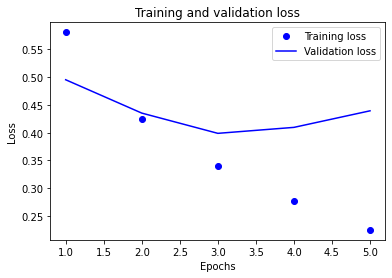

In [119]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Dense를 대폭 늘렸더니 과적합하는 에포크는 줄었습니다  
그러나 Loss 0.4의 영역에서 또 늘어나기 시작합니다

In [98]:
len(index_to_word)

30185

In [107]:
import tensorflow as tf

In [108]:
tf.keras.layers

<module 'keras.api._v2.keras.layers' from '/opt/conda/lib/python3.9/site-packages/keras/api/_v2/keras/layers/__init__.py'>

/tmp/ipykernel_4002/1256664785.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if index_to_word[i] in word2vec:
/tmp/ipykernel_4002/1256664785.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_matrix[i] = word2vec[index_to_word[i]]


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_17 (Embedding)     (None, None, 128)         1280000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 129       
Total params: 1,477,761
Trainable params: 1,477,761
Non-trainable params: 0
_________________________________________________________________
(29995, 99)
(29995,)
Epoch 1/5
59/59 - 12s - loss: 0.5634 - accuracy: 0.6998 - val_loss: 0.4165 - val_accuracy: 0.8

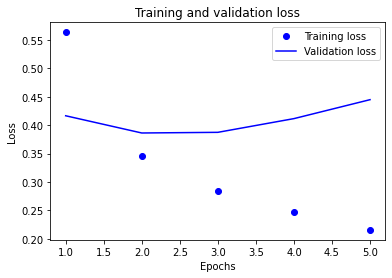

In [117]:
vocab_size =10000 # 어휘 사전 크기
word_vector_dim = word2vec.vector_size # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 word2vec 워드벡터 단어를 카피
for i in range(4, vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]


inputs = tf.keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = tf.keras.layers.Embedding(vocab_size, 128)(inputs)
# Add 2 bidirectional LSTMs
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
# Add a classifier
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

# validation 분리
X_val = X_train[:120000]
y_val = y_train[:120000]

# validation 제외 train set
partial_x_train = X_train[120000:]
partial_y_train = y_train[120000:]

print(partial_x_train.shape)
print(partial_y_train.shape)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs=5

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    # callbacks=[early_stopping],
                    validation_data=(X_val, y_val),
                    verbose=2)
results = model.evaluate(X_test, y_test, verbose=2)
print(results)
history_dict = history.history
print(history_dict.keys())
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 회고
마지막 모델은 tensorflow tutorial에 있는 모델을 가져와서 해봤는데요  
결국 성능을 더 올리진 못했습니다
물론 규제나 더 최신의 네트워크를 기준으로 쌓는다면 좋은 결과가 있었겠지만  
말뭉치를 바꾸는 조건하에서의 결과가 어떻게 되는지 좋은 실험이 되었습니다
무엇보다 트랜스포머 라이브러리를 통한 전이학습 위주로 모델을 사용해오다가  
이렇게 밑바닥부터 직접 만들어보니 재밌기도 하고 알아야 할점이 많이 보이기도 했습니다  
시간이 허용하는 안에서 여기까지 실험하지만 다음의 과제 영역에서는 실제 감성분석에 효과가 좋은  
논문의 네트워크 구조를 가져오고 한국어 임베딩을 제대로 한 상태에서 해보고 싶은 생각이 듭니다
그리고 최신의 모델보다 좋은 조건을 내볼 수 있다면 더 재밌어 질 듯 합니다
레이어 쌓는 기초를 다졌으니 이 다음은 더 넓은 범위의 테크닉을 사용해볼 수 있을 듯 합니다
